In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import fbprophet as fbp
from datetime import datetime, timedelta
stock = 'AAPL'
source = 'yahoo'
start = datetime(2018,1,1)
end = datetime.today()
df = web.DataReader(stock, source, start, end)
df['Median']  = (df['High'] - df['Low']) * 0.5 + df['Low']
df = df.reset_index()
df = df[['Date','Median']]
df.columns = ['ds', 'y']

In [55]:
prophet = fbp.Prophet()

In [56]:
prophet.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
future = prophet.make_future_dataframe(periods=365)

In [58]:
forecast = prophet.predict(future)

In [59]:
predictions = forecast[forecast.ds > end]
predictions.index = predictions['ds']
predictions = predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
df.index = df['ds']

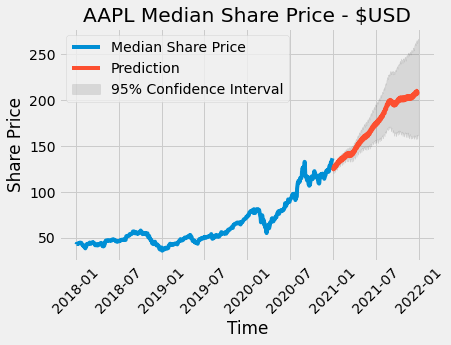

In [60]:
import matplotlib.style
plt.style.use('fivethirtyeight')
plt.plot(df['y'], label='Median Share Price')
plt.plot(predictions['yhat'], label='Prediction')
plt.title("AAPL Median Share Price - $USD")
plt.fill_between(predictions.index, predictions['yhat_lower'], predictions['yhat_upper'], color='k', alpha=0.1, label='95% Confidence Interval')
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.xticks(rotation=45)
plt.ylabel("Share Price")
plt.show()